In [1]:
!pip install pandas
!pip insall seaborn
!pip install openpyxl
!pip install numpy
!pip install matplotlib.pyplot

ERROR: unknown command "insall" - maybe you meant "install"
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.shape

(891, 15)

In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [8]:
df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [9]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [11]:
df['age'].fillna(df['age'].mean(),inplace=True)

/tmp/ipython-input-1492264711.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(),inplace=True)


In [16]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [17]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

/tmp/ipython-input-1024298632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [18]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [20]:
df.drop(columns=['deck'],inplace=True,errors='ignore')

In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# categorical variables analysis

In [22]:
df['survived'].value_counts()

,count
survived,
0,549
1,342


In [23]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


# Numerical variables analysis

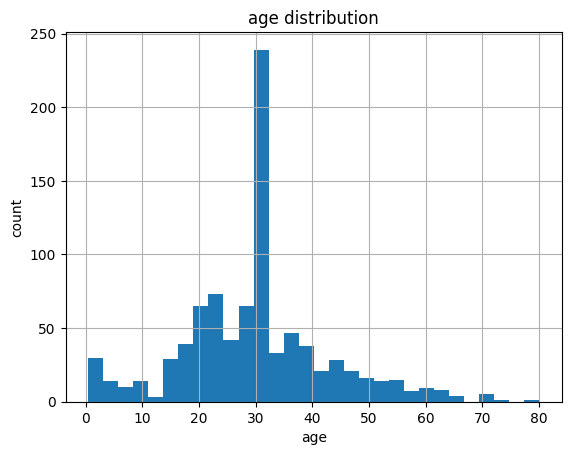

In [24]:
df['age'].hist(bins=30)
plt.xlabel('age')
plt.ylabel('count')
plt.title('age distribution')
plt.show()

# Fare Distribution

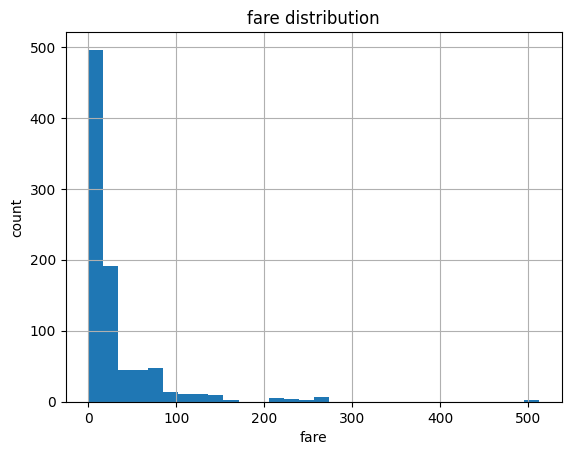

In [25]:
df['fare'].hist(bins=30)
plt.xlabel('fare')
plt.ylabel('count')
plt.title('fare distribution')
plt.show()

In [26]:
# Survival by gender
pd.crosstab(df['sex'],df['survived'])

survived,0,1
sex,,
female,81,233
male,468,109


In [27]:
# survival by passenger class
pd.crosstab(df['pclass'],df['survived'])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


# Correlation analysis

In [28]:
df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


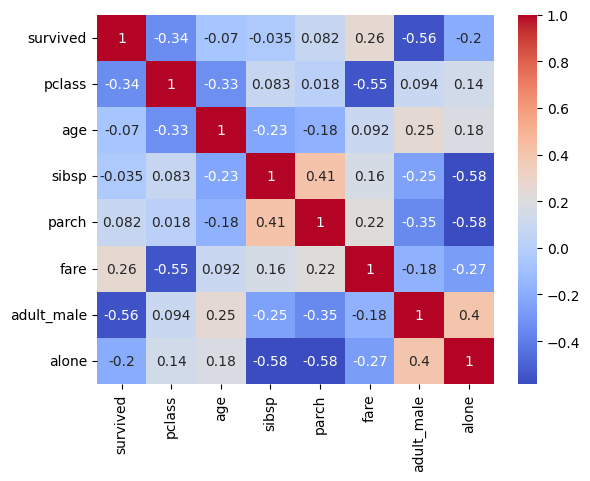

In [29]:
# heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [30]:
#Family_size
df['family_size']=df['sibsp']+df['parch']+1

<Axes: xlabel='fare'>

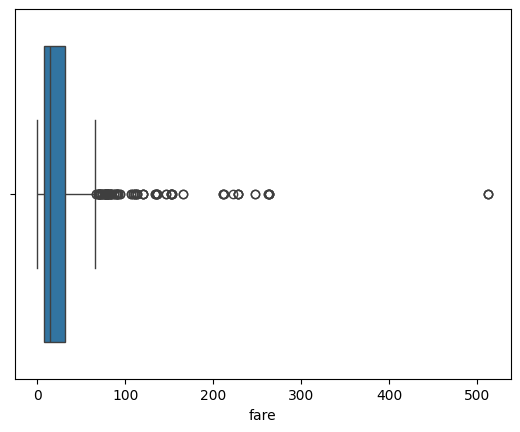

In [31]:
sns.boxplot(x=df['fare'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  family_size  891 non-null    int64   
dtypes: bool(2), category(1), float64(2), int64(5), object(5)
memory usage: 86.4+ KB


In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1


# Key insights

#Female had a higher survival rate than Male
#first class passenger survived more than others
#higher fare correlate with hoigher survival
#Ge alone not a strong predictor of survival